## pandasまとめ

### インポート
|コマンド  |説明  |
|---|---|
|import pandas as pd  |pandasインポート  |
|df = pd.read_csv("csvファイルパス", "sep" = ",")  |csv読み込み  |

### データ状態の確認
|コマンド  |説明  |
|---|---|
|df.shape|行数・列数|
|df.index|index|
|df.columns|カラムの確認|
|df.dtypes|各列のデータ型|

### 表示関連
|コマンド  |説明  |
|---|---|
|df.columns|カラムの表示|
|df[["ラベルA","ラベルB"]].head()|任意のラベルごとに表示|
|df.loc[行番号]|行の情報を表示|
|df[df["ラベルA"] >= 450]|ラベルAが450以上列の表示|
|df[["ラベルA","ラベルB"]].query("ラベルB >=450")|条件を満たすラベルAとラベルBの情報|


### データの変更とか
|コマンド|説明|
|---|---|
|df.set_index("data", inplace=True)|インデックスラベルをdataにする|
|df.rename(columns={"y":"sales"}, inplace=True)  |ラベルyをsalesにリネーム  |
|df.sort_values(by="sales", ascending=True).head()  |sales昇順  |
|df.sort_values("sales",ascending=False).head()  |sales降順  |

### インデックスラベルがdatetime型のとき関連
|コマンド|説明|
|---|---|
|df.index = pd.to_datetime(df.index, format='%Y-%m-%d')  |datetime型に変える  |
|df.sort_index().head()  |indexに対してソートする(indexがデフォのときもできる)  |
|df.resample('M').mean()  |月単位(M)で平均(mean)を出力  |
|df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))|month列を追加|
|df['period'] = pd.cut(list(df['day']),  bins=[0,10,20,31], labels=labels,right=True)|説明|


### データの欠損状態の確認
|コマンド|説明|
|---|---|
|df.isnull().sum()|各カラムごとにNaNの和を|
|df[df.isnull().any(axis=1)].head()|1つでもNaNが含まれる行だけを抽出|


### 欠損の置き換えや削除
|コマンド|説明|
|---|---|
|df.fillna(value={'payday': 0.0}, inplace=True)|payday列のNaNを0.0に置き換え|
|df.dropna(subset=['kcal'], axis=0, inplace=True)|kcal列にNaNがある行を削除|
|df['aaa'] = df['aaa'].replace('--', 0).astype(float)|aaa列で値に--が入っているところを0に置き換える|
|df.drop(['remarks'], axis=1, inplace=True)|remarks列をデータごと削除|


### 集計


In [8]:
list(df["y"])

[90,
 101,
 118,
 120,
 130,
 135,
 145,
 140,
 151,
 116,
 151,
 153,
 151,
 171,
 134,
 165,
 155,
 157,
 109,
 111,
 160,
 145,
 145,
 151,
 134,
 122,
 121,
 80,
 131,
 128,
 129,
 87,
 129,
 134,
 107,
 85,
 126,
 129,
 126,
 107,
 92,
 126,
 120,
 121,
 105,
 92,
 139,
 121,
 126,
 111,
 91,
 137,
 111,
 84,
 86,
 137,
 99,
 113,
 85,
 113,
 129,
 104,
 104,
 90,
 69,
 131,
 100,
 110,
 77,
 73,
 123,
 89,
 68,
 80,
 70,
 129,
 90,
 72,
 100,
 102,
 77,
 51,
 55,
 106,
 84,
 125,
 99,
 100,
 90,
 107,
 96,
 88,
 87,
 128,
 92,
 82,
 57,
 57,
 56,
 109,
 78,
 63,
 56,
 80,
 54,
 97,
 64,
 47,
 88,
 59,
 58,
 73,
 70,
 64,
 58,
 126,
 70,
 71,
 104,
 54,
 65,
 77,
 79,
 74,
 64,
 119,
 74,
 59,
 47,
 64,
 93,
 74,
 56,
 50,
 72,
 121,
 76,
 63,
 66,
 56,
 57,
 72,
 61,
 64,
 49,
 74,
 65,
 54,
 50,
 53,
 63,
 82,
 56,
 54,
 48,
 124,
 65,
 51,
 53,
 53,
 55,
 53,
 56,
 62,
 83,
 65,
 52,
 58,
 60,
 38,
 75,
 54,
 58,
 63,
 129,
 45,
 40,
 56,
 53,
 56,
 54,
 100,
 55,
 68,
 62,
 56

In [3]:
#pandasのインポート
import pandas as pd

In [4]:
df = pd.read_csv("./data/lunch_box.csv", sep = ",")

In [6]:
df.head(10)

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
5,2013-11-25,135,月,1,鶏の唐揚,NaN,NaN,NaN,NaN,曇,--,14.6
6,2013-11-26,145,火,0,豚のスタミナ炒め,NaN,NaN,NaN,NaN,快晴,--,17.9
7,2013-11-27,140,水,1,ボローニャ風カツ,NaN,NaN,NaN,NaN,晴れ,--,14.7
8,2013-11-28,151,木,0,ハンバーグ,NaN,NaN,NaN,NaN,薄曇,--,17.7
9,2013-11-29,116,金,0,タルタルinソーセージカツ,NaN,NaN,NaN,NaN,快晴,--,12.1


In [4]:
df.columns

Index(['datetime', 'y', 'week', 'soldout', 'name', 'kcal', 'remarks', 'event',
       'payday', 'weather', 'precipitation', 'temperature'],
      dtype='object')

In [5]:
df[["name","kcal"]].head()

,name,kcal
0,厚切りイカフライ,NaN
1,手作りヒレカツ,NaN
2,白身魚唐揚げ野菜あん,NaN
3,若鶏ピリ辛焼,NaN
4,ビッグメンチカツ,NaN


In [6]:
df.loc[100]

datetime         2014-4-22
y                       78
week                     火
soldout                  1
name                 マーボ豆腐
kcal                   382
remarks                NaN
event                  NaN
payday                 NaN
weather                  曇
precipitation           --
temperature           18.8
Name: 100, dtype: object

In [7]:
df[df["kcal"] >= 450]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
29,2014-1-8,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,NaN,曇,--,9.8
33,2014-1-15,134,水,0,さんま辛味焼,450.0,NaN,NaN,NaN,曇,--,2.9
43,2014-1-29,121,水,1,チーズ入りメンチカツ,450.0,NaN,NaN,NaN,快晴,--,10.3
45,2014-1-31,92,金,1,メダイ照り焼,460.0,NaN,NaN,NaN,快晴,--,14.1
193,2014-9-9,63,火,0,ハンバーグデミソース,460.0,NaN,NaN,NaN,晴れ,--,26.8
194,2014-9-10,54,水,0,ぶりレモンペッパー焼き,450.0,NaN,NaN,1.0,曇,0,25.0


In [8]:
df[["name","kcal"]].query("kcal >=450")

,name,kcal
29,豚肉の生姜焼,462.0
33,さんま辛味焼,450.0
43,チーズ入りメンチカツ,450.0
45,メダイ照り焼,460.0
193,ハンバーグデミソース,460.0
194,ぶりレモンペッパー焼き,450.0


In [9]:
df.set_index("datetime", inplace=True)
df.head(5)

,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [10]:
df.rename(columns={"y":"sales"}, inplace=True)
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [11]:
df.sort_values(by="sales", ascending=True).head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-9-22,29,月,0,筑前煮,395.0,NaN,NaN,NaN,晴れ,--,25.2
2014-8-1,38,金,0,豚肉の生姜焼き,380.0,NaN,NaN,NaN,薄曇,--,32.7
2014-8-29,39,金,0,チキンの辛味噌焼き,398.0,NaN,NaN,NaN,曇,0,25.1
2014-9-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1
2014-8-12,40,火,1,厚切ハムカツ,400.0,NaN,NaN,NaN,雨,0,29.4


In [12]:
df.sort_values("sales",ascending=False).head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2013-12-5,171,木,0,鶏のカッシュナッツ炒め,NaN,NaN,NaN,NaN,快晴,--,13.8
2013-12-9,165,月,1,ハンバーグデミソース,NaN,NaN,NaN,NaN,曇,--,9.1
2013-12-16,160,月,0,カキフライタルタル,NaN,NaN,NaN,NaN,快晴,--,11.3
2013-12-11,157,水,0,五目御飯,NaN,NaN,NaN,NaN,曇,--,11.0
2013-12-10,155,火,0,やわらかロースのサムジョン,NaN,NaN,NaN,1.0,曇,0.5,7.1


In [13]:
df.index

Index(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21', '2013-11-22',
       '2013-11-25', '2013-11-26', '2013-11-27', '2013-11-28', '2013-11-29',
       ...
       '2014-9-16', '2014-9-17', '2014-9-18', '2014-9-19', '2014-9-22',
       '2014-9-24', '2014-9-25', '2014-9-26', '2014-9-29', '2014-9-30'],
      dtype='object', name='datetime', length=207)

In [14]:
df.sales

datetime
2013-11-18     90
2013-11-19    101
2013-11-20    118
2013-11-21    120
2013-11-22    130
2013-11-25    135
2013-11-26    145
2013-11-27    140
2013-11-28    151
2013-11-29    116
2013-12-2     151
2013-12-3     153
2013-12-4     151
2013-12-5     171
2013-12-6     134
2013-12-9     165
2013-12-10    155
2013-12-11    157
2013-12-12    109
2013-12-13    111
2013-12-16    160
2013-12-17    145
2013-12-18    145
2013-12-19    151
2013-12-20    134
2013-12-24    122
2013-12-25    121
2013-12-26     80
2014-1-7      131
2014-1-8      128
             ... 
2014-8-18      56
2014-8-19      53
2014-8-20      56
2014-8-21      54
2014-8-22     100
2014-8-25      55
2014-8-26      68
2014-8-27      62
2014-8-28      56
2014-8-29      39
2014-9-1       65
2014-9-2       68
2014-9-3       53
2014-9-4       54
2014-9-5       43
2014-9-8       68
2014-9-9       63
2014-9-10      54
2014-9-11      53
2014-9-12     115
2014-9-16      56
2014-9-17      49
2014-9-18      46
2014-9-19      45
2

In [15]:
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")

In [16]:
df.index

DatetimeIndex(['2013-11-18', '2013-11-19', '2013-11-20', '2013-11-21',
               '2013-11-22', '2013-11-25', '2013-11-26', '2013-11-27',
               '2013-11-28', '2013-11-29',
               ...
               '2014-09-16', '2014-09-17', '2014-09-18', '2014-09-19',
               '2014-09-22', '2014-09-24', '2014-09-25', '2014-09-26',
               '2014-09-29', '2014-09-30'],
              dtype='datetime64[ns]', name='datetime', length=207, freq=None)

In [17]:
df.sort_index(ascending=False).head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,
2014-09-30,40,火,0,鶏肉とカシューナッツ炒め,398.0,NaN,NaN,NaN,快晴,--,28.1
2014-09-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6
2014-09-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
2014-09-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
2014-09-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8


In [18]:
df[["name"]].sort_index(ascending = False).head()

,name
datetime,
2014-09-30,鶏肉とカシューナッツ炒め
2014-09-29,豚肉と玉子の炒め
2014-09-26,ランチビュッフェ
2014-09-25,牛カルビ焼き肉
2014-09-24,白身魚のマスタード焼き


In [19]:
df.resample("M").mean()

,sales,soldout,kcal,payday,temperature
datetime,,,,,
2013-11-30,124.600000,0.500000,NaN,NaN,16.060000
2013-12-31,139.722222,0.444444,NaN,1.0,10.844444
2014-01-31,115.222222,0.611111,427.555556,1.0,8.716667
2014-02-28,107.842105,0.526316,420.947368,1.0,7.815789
2014-03-31,89.350000,0.450000,382.157895,1.0,12.505000
2014-04-30,85.761905,0.476190,360.000000,1.0,18.176190
2014-05-31,74.200000,0.550000,419.111111,1.0,22.505000
2014-06-30,67.285714,0.333333,423.315789,1.0,25.409524
2014-07-31,61.363636,0.454545,397.200000,1.0,29.350000


In [20]:
df["month"] = list(pd.Series(df.index).apply(lambda x: x.month))
df["day"] = list(pd.Series(df.index).apply(lambda x: x.day))

In [21]:
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day
datetime,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22


In [22]:
labels = ['上旬', '中旬', '下旬']
df['period'] = pd.cut(list(df['day']),  bins=[0,10,20,31], labels=labels, right=True) # 0<day≦10, 10<day≦20, 20<day≦31

df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1,11,22,下旬


In [23]:
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday           197
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [24]:
print(df[df.isnull().any(axis=1)].shape)

(207, 14)


In [25]:
df.fillna(value={"payday":0.0}, inplace=True)

In [26]:
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,0.0,快晴,--,19.8,11,18,中旬
2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,0.0,快晴,--,17.0,11,19,中旬
2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,0.0,快晴,--,15.5,11,20,中旬
2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,0.0,快晴,--,15.2,11,21,下旬
2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,0.0,快晴,--,16.1,11,22,下旬


In [27]:
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal              41
remarks          186
event            193
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [28]:
df.dropna(subset=["kcal"], axis=0,inplace=True)
print(df.shape)

(166, 14)


In [29]:
df["precipitation"].unique()

array(['--', '0', '0.5', '1.5', '1', '6', '6.5', '2.5'], dtype=object)

In [30]:
df['precipitation'] = df['precipitation'].replace('--', 0).astype(float)

In [31]:
df.isnull().sum()

sales              0
week               0
soldout            0
name               0
kcal               0
remarks          158
event            155
payday             0
weather            0
precipitation      0
temperature        0
month              0
day                0
period             0
dtype: int64

In [32]:
df.head()

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


In [33]:
df

,sales,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,NaN,0.0,晴れ,0.0,5.8,1,14,中旬
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,NaN,0.0,曇,0.0,2.9,1,15,中旬
2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,NaN,0.0,快晴,0.0,7.0,1,16,中旬
2014-01-17,85,金,1,回鍋肉,430.0,NaN,ママの会,0.0,快晴,0.0,7.8,1,17,中旬
2014-01-20,126,月,1,ジューシーメンチカツ,375.0,NaN,NaN,0.0,晴れ,0.0,6.5,1,20,中旬


In [34]:
len(df)

166

In [35]:
df.drop(["remarks"],axis=1,inplace=True)

In [36]:
df.head()

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period
datetime,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,0.0,快晴,0.0,7.3,1,7,上旬
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,0.0,曇,0.0,9.8,1,8,上旬
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬


In [37]:
df["weather"].value_counts()

曇     44
晴れ    41
快晴    34
薄曇    23
雨     22
雪      1
雷電     1
Name: weather, dtype: int64

In [39]:
df["period"].value_counts()

上旬    57
下旬    56
中旬    53
Name: period, dtype: int64

In [40]:
df.groupby(["week"])["soldout"].count()

week
月    34
木    37
水    37
火    35
金    23
Name: soldout, dtype: int64

In [44]:
df.groupby(["month","period"])["sales"].sum()

month  period
1      上旬         475
       中旬         581
       下旬        1018
2      上旬         725
       中旬         715
       下旬         609
3      上旬         614
       中旬         698
       下旬         369
4      上旬         792
       中旬         344
       下旬         457
5      上旬         316
       中旬         406
       下旬         517
6      上旬         467
       中旬         440
       下旬         311
7      上旬         460
       中旬         277
       下旬         406
8      上旬         288
       中旬         250
       下旬         334
9      上旬         468
       中旬         249
       下旬         234
Name: sales, dtype: int64

In [46]:
df.groupby(["month"])["weather"].value_counts()

month  weather
1      快晴         12
       曇           4
       晴れ          2
2      晴れ          6
       曇           5
       快晴          3
       薄曇          2
       雨           2
       雪           1
3      快晴          7
       曇           6
       晴れ          3
       雨           3
4      晴れ          6
       快晴          5
       曇           3
       薄曇          3
       雨           2
5      薄曇          6
       晴れ          5
       曇           3
       雨           2
       快晴          1
       雷電          1
6      雨           7
       薄曇          6
       曇           4
       晴れ          2
7      晴れ          9
       曇           4
       薄曇          3
       雨           3
       快晴          1
8      曇           5
       快晴          3
       晴れ          3
       雨           3
       薄曇          2
9      曇          10
       晴れ          5
       快晴          2
       薄曇          1
Name: weather, dtype: int64

In [48]:
df.groupby(["weather"])["temperature"].mean()

weather
快晴    15.294118
晴れ    22.558537
曇     19.377273
薄曇    23.926087
雨     18.813636
雪      1.200000
雷電    19.000000
Name: temperature, dtype: float64

In [50]:
df["temperature_diff"] = df["temperature"].diff(periods=1)

In [53]:
df[["temperature","temperature_diff"]].head()

,temperature,temperature_diff
datetime,,
2014-01-07,7.3,NaN
2014-01-08,9.8,2.5
2014-01-09,10.9,1.1
2014-01-10,5.1,-5.8
2014-01-14,5.8,0.7


In [54]:
df['temperature_rolling_mean'] = df['temperature'].rolling(window=3).mean()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean']].head()

,temperature,temperature_diff,temperature_rolling_mean
datetime,,,
2014-01-07,7.3,NaN,NaN
2014-01-08,9.8,2.5,NaN
2014-01-09,10.9,1.1,9.333333
2014-01-10,5.1,-5.8,8.600000
2014-01-14,5.8,0.7,7.266667


In [55]:
df

,sales,week,soldout,name,kcal,event,payday,weather,precipitation,temperature,month,day,period,temperature_diff,temperature_rolling_mean
datetime,,,,,,,,,,,,,,,
2014-01-07,131,火,0,カレー入りソーセージカツ,404.0,NaN,0.0,快晴,0.0,7.3,1,7,上旬,NaN,NaN
2014-01-08,128,水,0,豚肉の生姜焼,462.0,NaN,0.0,曇,0.0,9.8,1,8,上旬,2.5,NaN
2014-01-09,129,木,1,鶏チリソース,435.0,NaN,0.0,曇,0.0,10.9,1,9,上旬,1.1,9.333333
2014-01-10,87,金,0,手作りロースカツ,440.0,NaN,1.0,快晴,0.0,5.1,1,10,上旬,-5.8,8.600000
2014-01-14,129,火,1,鶏の照り焼きマスタード,376.0,NaN,0.0,晴れ,0.0,5.8,1,14,中旬,0.7,7.266667
2014-01-15,134,水,0,さんま辛味焼,450.0,NaN,0.0,曇,0.0,2.9,1,15,中旬,-2.9,4.600000
2014-01-16,107,木,0,カレイ唐揚げ野菜あんかけ,415.0,NaN,0.0,快晴,0.0,7.0,1,16,中旬,4.1,5.233333
2014-01-17,85,金,1,回鍋肉,430.0,ママの会,0.0,快晴,0.0,7.8,1,17,中旬,0.8,5.900000
2014-01-20,126,月,1,ジューシーメンチカツ,375.0,NaN,0.0,晴れ,0.0,6.5,1,20,中旬,-1.3,7.100000


In [59]:
df['temperature_pct_change'] = df['temperature'].pct_change()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change']].head()

,temperature,temperature_diff,temperature_rolling_mean,temperature_pct_change
datetime,,,,
2014-01-07,7.3,NaN,NaN,NaN
2014-01-08,9.8,2.5,NaN,0.342466
2014-01-09,10.9,1.1,9.333333,0.112245
2014-01-10,5.1,-5.8,8.600000,-0.532110
2014-01-14,5.8,0.7,7.266667,0.137255


In [60]:
# 'temperature'列に一つでもNaNがある行を削除
df.dropna(subset=['temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change'], axis=0, inplace=True)

In [61]:
df.isnull().sum()

sales                         0
week                          0
soldout                       0
name                          0
kcal                          0
event                       153
payday                        0
weather                       0
precipitation                 0
temperature                   0
month                         0
day                           0
period                        0
temperature_diff              0
temperature_rolling_mean      0
temperature_pct_change        0
dtype: int64

In [62]:
df["sales"].plot()

In [63]:
# 'temperature'列に一つでもNaNがある行を削除
df.dropna(subset=['temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change'], axis=0, inplace=True)

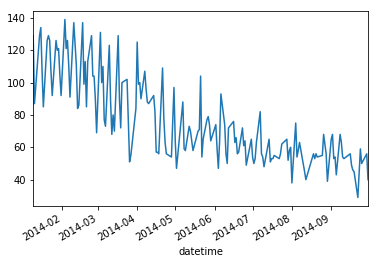

In [65]:
df["sales"].plot()

NameError: name 'plt' is not defined

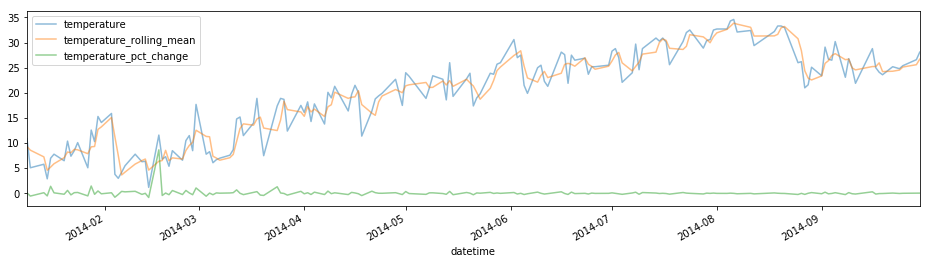

In [66]:
# 少しだけ情報量の多い折れ線グラフ
df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'],  figsize=(16,4), alpha=0.5) # x軸がindexである場合は明記しなくても可
plt.title('気温変化に関する図', fontproperties=font_prop) # fontpropertiesは日本語表示に必要

In [67]:
from matplotlib.font_manager import FontProperties
font_path = '/Users/ysdyt/Downloads/TakaoPGothic.ttf'  #DLしたフォントのパスを指定
font_prop = FontProperties(fname=font_path)

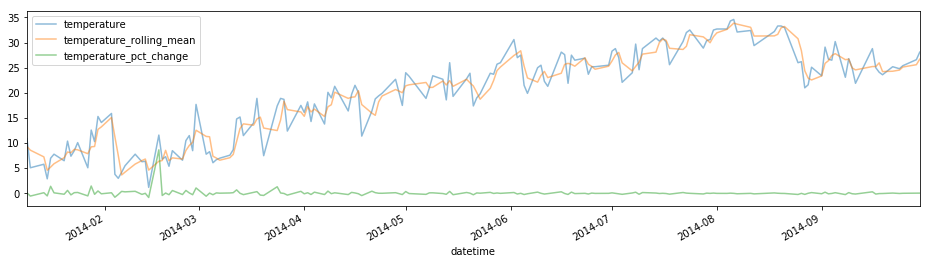

In [70]:
# 少しだけ情報量の多い折れ線グラフ
df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'],  figsize=(16,4), alpha=0.5) # x軸がindexである場合は明記しなくても可

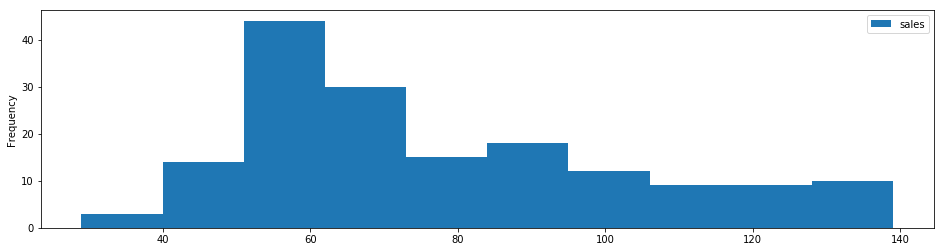

In [72]:
df.plot(kind='hist', y='sales' , bins=10, figsize=(16,4), alpha=1.)

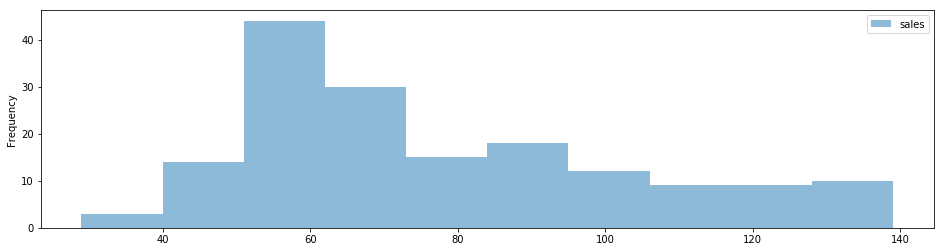

In [73]:
df.plot(kind='hist', y='sales' , bins=10, figsize=(16,4), alpha=0.5)

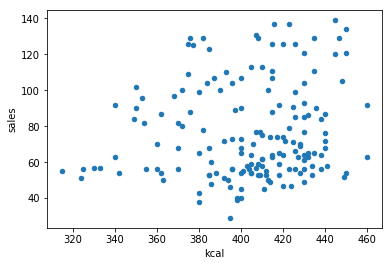

In [74]:
# 散布図
df.plot(kind='scatter', x='kcal', y='sales')

In [75]:
df[['kcal', 'sales']].corr()

,kcal,sales
kcal,1.000000,0.129521
sales,0.129521,1.000000


In [76]:
pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())

sales
month period       
1     上旬        216
      中旬        581
      下旬       1018
2     上旬        725
      中旬        715
      下旬        609
3     上旬        614
      中旬        698
      下旬        369
4     上旬        792
      中旬        344
      下旬        457
5     上旬        316
      中旬        406
      下旬        517
6     上旬        467
      中旬        440
      下旬        311
7     上旬        460
      中旬        277
      下旬        406
8     上旬        288
      中旬        250
      下旬        334
9     上旬        468
      中旬        249
      下旬        234

In [77]:
monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
pivot_monthly_df = monthly_df.reset_index()
pivot_monthly_df

,month,period,sales
0,1,上旬,216
1,1,中旬,581
2,1,下旬,1018
3,2,上旬,725
4,2,中旬,715
5,2,下旬,609
6,3,上旬,614
7,3,中旬,698
8,3,下旬,369
9,4,上旬,792


In [78]:
monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
pivot_monthly_df = monthly_df.reset_index().pivot(index='month', columns='period', values='sales')
pivot_monthly_df

period,上旬,中旬,下旬
month,,,
1,216,581,1018
2,725,715,609
3,614,698,369
4,792,344,457
5,316,406,517
6,467,440,311
7,460,277,406
8,288,250,334
9,468,249,234


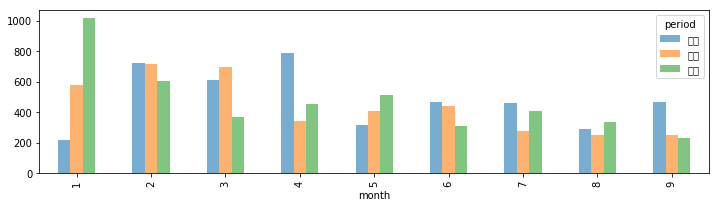

In [79]:
pivot_monthly_df.plot(kind='bar', alpha=0.6, figsize=(12,3))

In [81]:
print(df.columns)
print(len(df.columns))

Index(['sales', 'week', 'soldout', 'name', 'kcal', 'event', 'payday',
       'weather', 'precipitation', 'temperature', 'month', 'day', 'period',
       'temperature_diff', 'temperature_rolling_mean',
       'temperature_pct_change'],
      dtype='object')
16


In [82]:
dummy_df = pd.get_dummies(df, columns=['week', 'name', 'event', 'weather', 'period'])
dummy_df.head()

,sales,soldout,kcal,payday,precipitation,temperature,month,day,temperature_diff,temperature_rolling_mean,...,weather_快晴,weather_晴れ,weather_曇,weather_薄曇,weather_雨,weather_雪,weather_雷電,period_上旬,period_中旬,period_下旬
datetime,,,,,,,,,,,,,,,,,,,,,
2014-01-09,129,1,435.0,0.0,0.0,10.9,1,9,1.1,9.333333,...,0,0,1,0,0,0,0,1,0,0
2014-01-10,87,0,440.0,1.0,0.0,5.1,1,10,-5.8,8.600000,...,1,0,0,0,0,0,0,1,0,0
2014-01-14,129,1,376.0,0.0,0.0,5.8,1,14,0.7,7.266667,...,0,1,0,0,0,0,0,0,1,0
2014-01-15,134,0,450.0,0.0,0.0,2.9,1,15,-2.9,4.600000,...,0,0,1,0,0,0,0,0,1,0
2014-01-16,107,0,415.0,0.0,0.0,7.0,1,16,4.1,5.233333,...,1,0,0,0,0,0,0,0,1,0


In [83]:
dummy_df.to_csv("./processed_datamart.csv", encoding="utf-8")